#                             Exploratory Data Analysis:NYC Trip Duration

In [2]:
#Importing Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
from geopy.distance import great_circle 
# For Calculating Distance importing this library(geopy)

In [3]:
#Reading the Dataset
data=pd.read_csv("nyc_taxi_trip_duration.csv")

In [4]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
# Checking the Shape of the Dataset
data.shape

(729322, 11)

The NewYork Dataset have 729322 rows and 11 columns 

In [10]:
# Checking the statistics of Variables in a datset at a Glance
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


# We get Inference from that :
    1.The count variables are same as no of rows in our dataset for all the continous variables which means No Missing Value.
    2.Passengers Count ranges from 0 to 9.
    3.There are two types of Vendor Type supplying Taxi in our dataset.
    4.Trip Duration have high Standard Deviation.The longest trip was around 277.6 hours.
    

In [11]:
#Verifying Missing Values as got from describe
data.isnull().sum()

#No missing Values in our Dataset we can observe

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [12]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [13]:
#Checking the Data Types
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [14]:
data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [15]:
data.dtypes[data.dtypes== 'float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

In [16]:
data.dtypes[data.dtypes=='object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

# Data Types
1.The pickup_datetime and dropoff_datetime need to be changed into datetime format.

2.The store and fwd flag need to be change into Category Format(Yes/no).

In [17]:
data['pickup_datetime'] = data['pickup_datetime'].astype('datetime64[ns]')
data['dropoff_datetime']=data['dropoff_datetime'].astype('datetime64[ns]')
data['store_and_fwd_flag']=data['store_and_fwd_flag'].astype('category')

In [18]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

# Datetime 

In [19]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])


In [20]:
#Extracting Day of the Week(Mon-Sun)
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()

#Extracting Day of the Weekday
data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday

#Extracting Month of the Month
data['P_Month']=data['pickup_datetime'].dt.month_name()
data['D_Month']=data['dropoff_datetime'].dt.month_name()


#Extracting hour,min of the hour
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour

data['pickup_minute']=data['pickup_datetime'].dt.minute
data['dropoff_minute']=data['dropoff_datetime'].dt.minute


In [21]:
data[['pickup_datetime','dropoff_datetime','pickup_day','dropoff_day','pickup_day_no','dropoff_day_no','P_Month','D_Month','pickup_hour','dropoff_hour','pickup_minute','dropoff_minute']].head()


,pickup_datetime,dropoff_datetime,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,P_Month,D_Month,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute
0,2016-02-29 16:40:21,2016-02-29 16:47:01,Monday,Monday,0,0,February,February,16,16,40,47
1,2016-03-11 23:35:37,2016-03-11 23:53:57,Friday,Friday,4,4,March,March,23,23,35,53
2,2016-02-21 17:59:33,2016-02-21 18:26:48,Sunday,Sunday,6,6,February,February,17,18,59,26
3,2016-01-05 09:44:31,2016-01-05 10:03:32,Tuesday,Tuesday,1,1,January,January,9,10,44,3
4,2016-02-17 06:42:23,2016-02-17 06:56:31,Wednesday,Wednesday,2,2,February,February,6,6,42,56


In [22]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,P_Month,D_Month,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,Monday,Monday,0,0,February,February,16,16,40,47
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,Friday,Friday,4,4,March,March,23,23,35,53
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,Sunday,Sunday,6,6,February,February,17,18,59,26
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,Tuesday,Tuesday,1,1,January,January,9,10,44,3
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,Wednesday,Wednesday,2,2,February,February,6,6,42,56


In [23]:
def distance_Trip(pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude):
    start_coordinates=(pickup_latitude,pickup_longitude)
    stop_coordinates=(dropoff_latitude,dropoff_longitude)
    return great_circle(start_coordinates,stop_coordinates).km


In [24]:
data['distance'] =data.apply(lambda x: distance_Trip(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']), axis=1)

In [25]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,P_Month,D_Month,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,Monday,0,0,February,February,16,16,40,47,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,Friday,4,4,March,March,23,23,35,53,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,Sunday,6,6,February,February,17,18,59,26,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,Tuesday,1,1,January,January,9,10,44,3,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,Wednesday,2,2,February,February,6,6,42,56,4.328540


# Univariate Analysis

In [26]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_day', 'dropoff_day', 'pickup_day_no',
       'dropoff_day_no', 'P_Month', 'D_Month', 'pickup_hour', 'dropoff_hour',
       'pickup_minute', 'dropoff_minute', 'distance'],
      dtype='object')

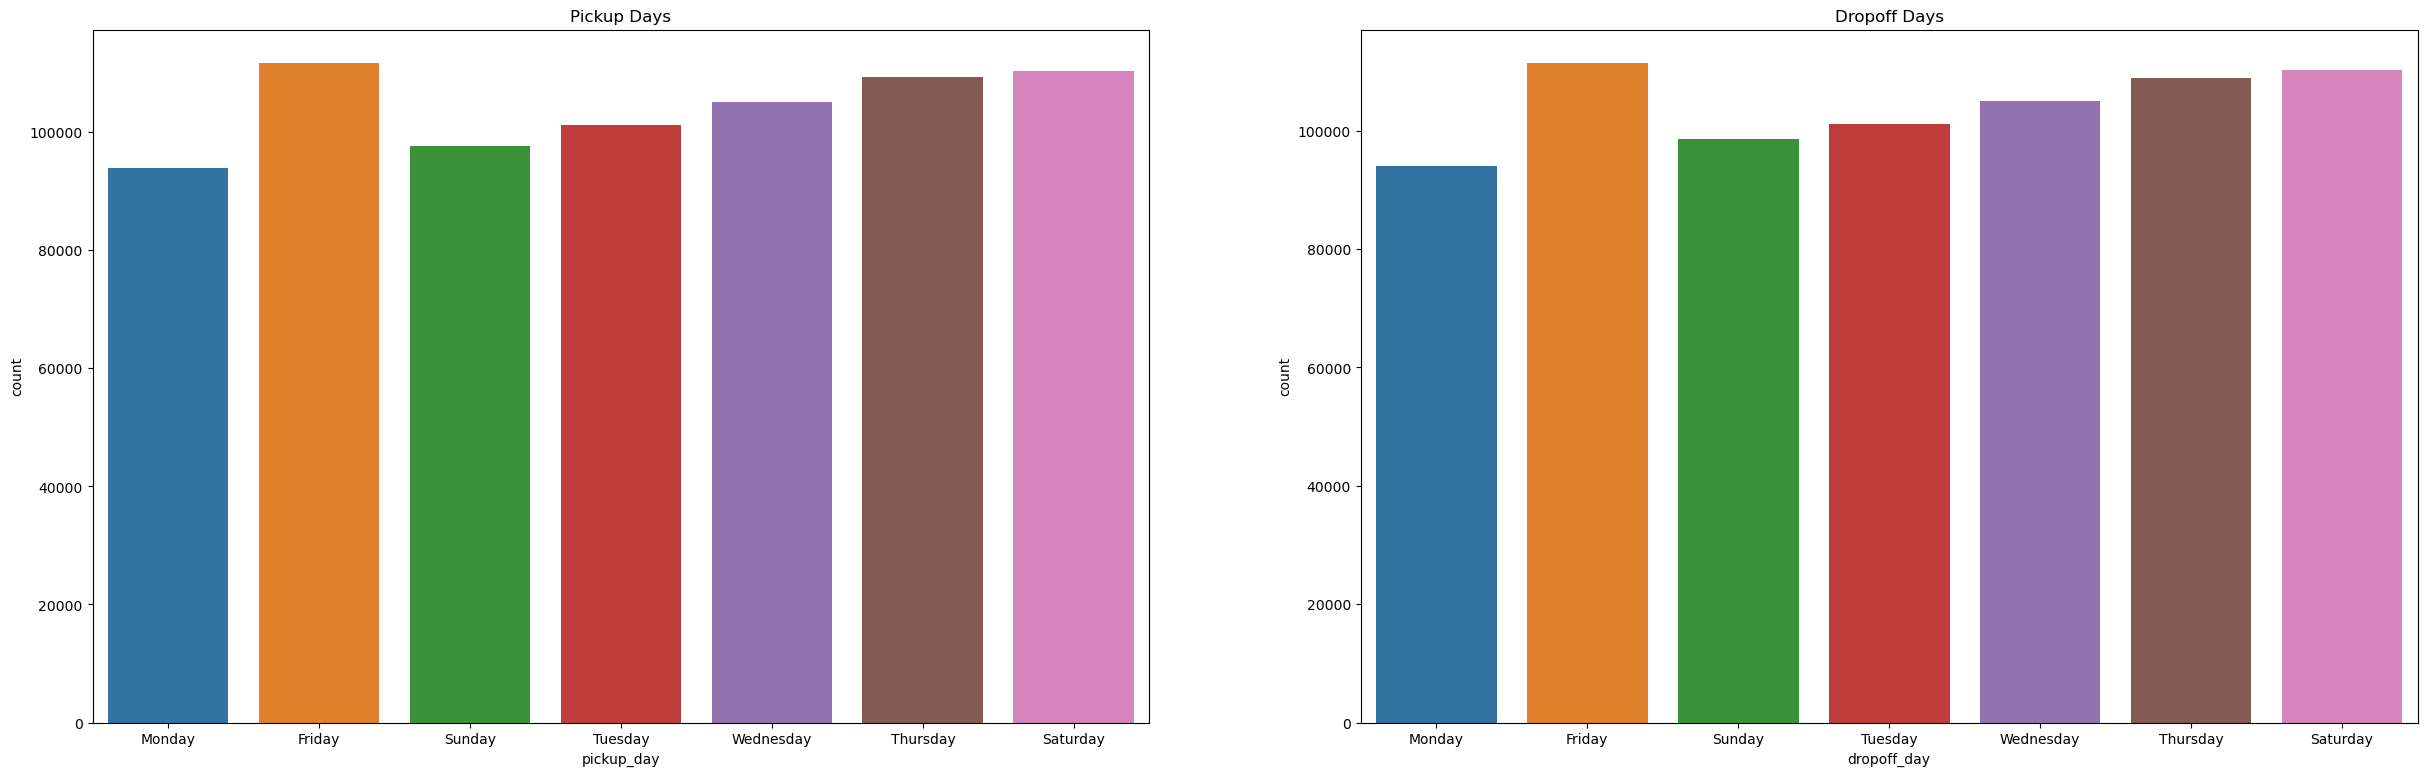

In [27]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(30,9))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=data,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=data,ax=ax2)


Friday is the Busiest Week we can observe from the Dataset.

In [28]:
data['store_and_fwd_flag'].value_counts(normalize=True)

store_and_fwd_flag
N    0.994461
Y    0.005539
Name: proportion, dtype: float64

99 % of the Time the Trip is not Recorded in the Server.

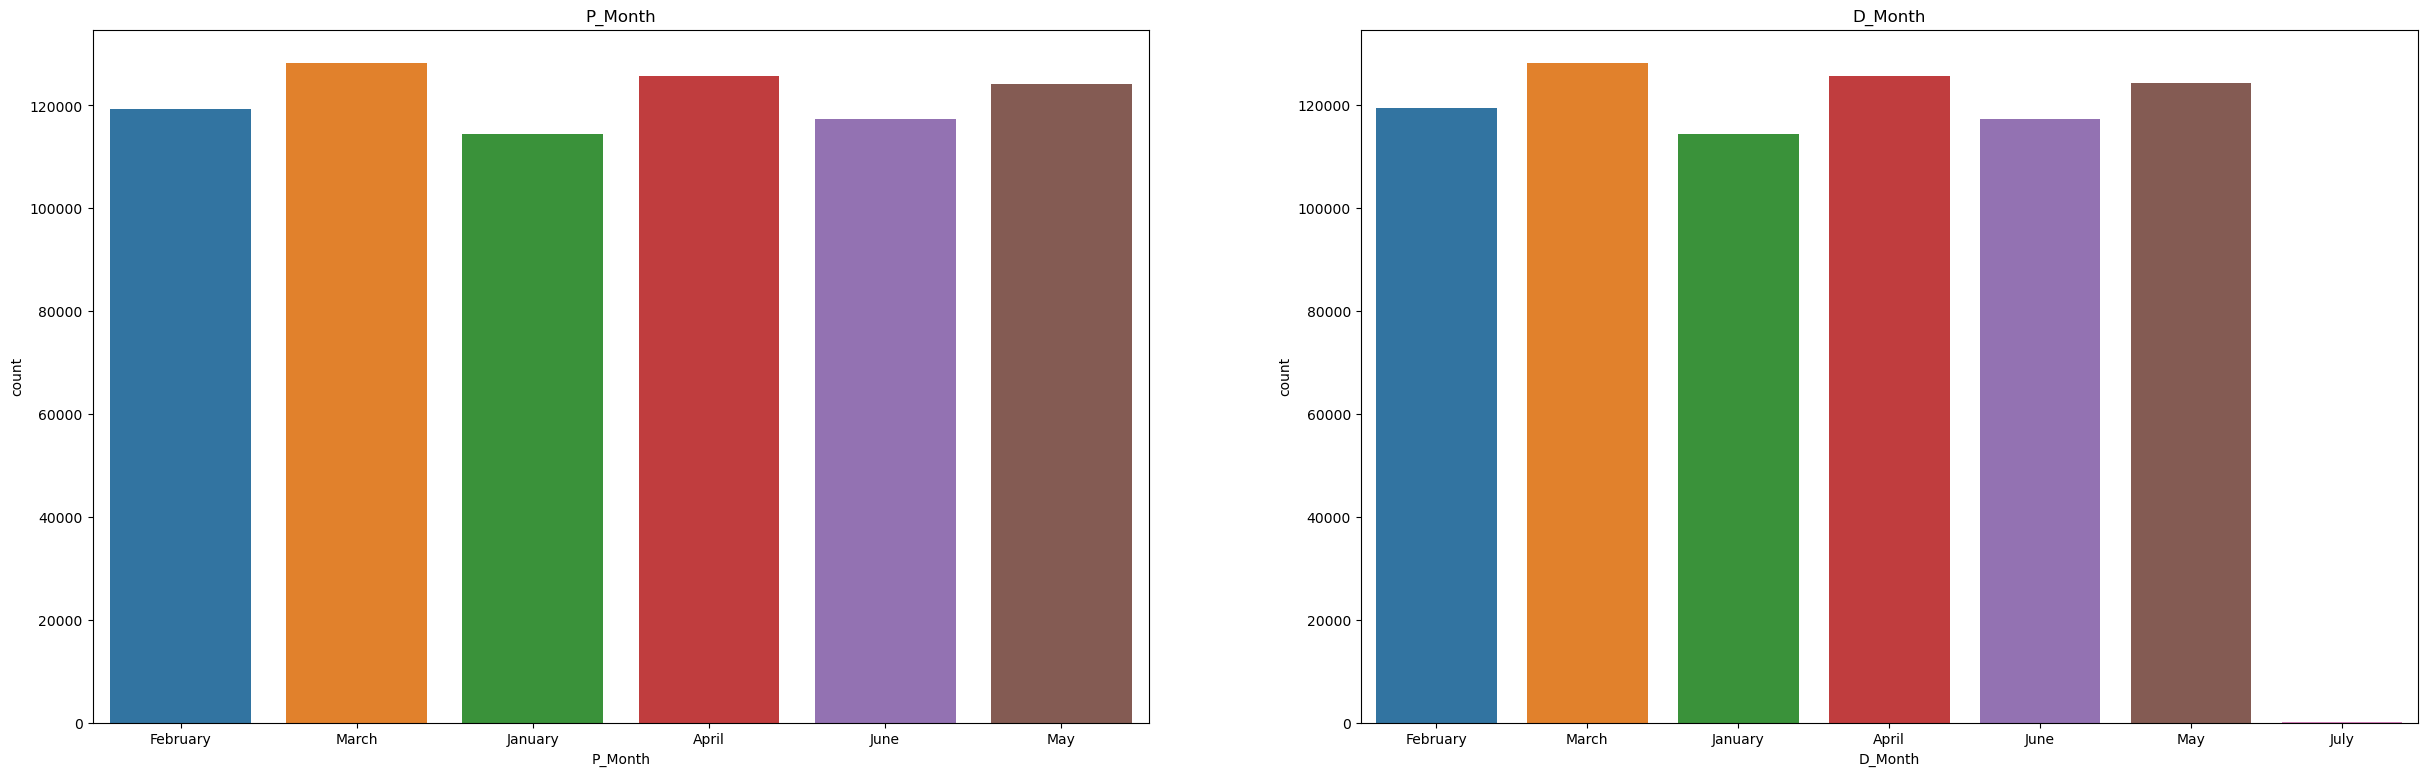

In [29]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(30,9))
ax3.set_title('P_Month')
ax=sns.countplot(x="P_Month",data=data,ax=ax3)
ax4.set_title('D_Month')
ax=sns.countplot(x="D_Month",data=data,ax=ax4)

March is the Most Busiest Month followed by April for the Taxi Drivers.

In [30]:
def Duration(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [31]:
data['pickup_timeofday']=data['pickup_hour'].apply(Duration)
data['dropoff_timeofday']=data['dropoff_hour'].apply(Duration)

In [32]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day_no,P_Month,D_Month,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,distance,pickup_timeofday,dropoff_timeofday
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,0,February,February,16,16,40,47,1.199074,Evening,Evening
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,4,March,March,23,23,35,53,4.129117,Late night,Late night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,6,February,February,17,18,59,26,7.250763,Evening,Evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,January,January,9,10,44,3,2.361101,Morning,Morning
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,2,February,February,6,6,42,56,4.328540,Morning,Morning


C:\Users\deshp\AppData\Local\Temp\ipykernel_35368\3842022026.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['passenger_count'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='passenger_count', ylabel='Density'>

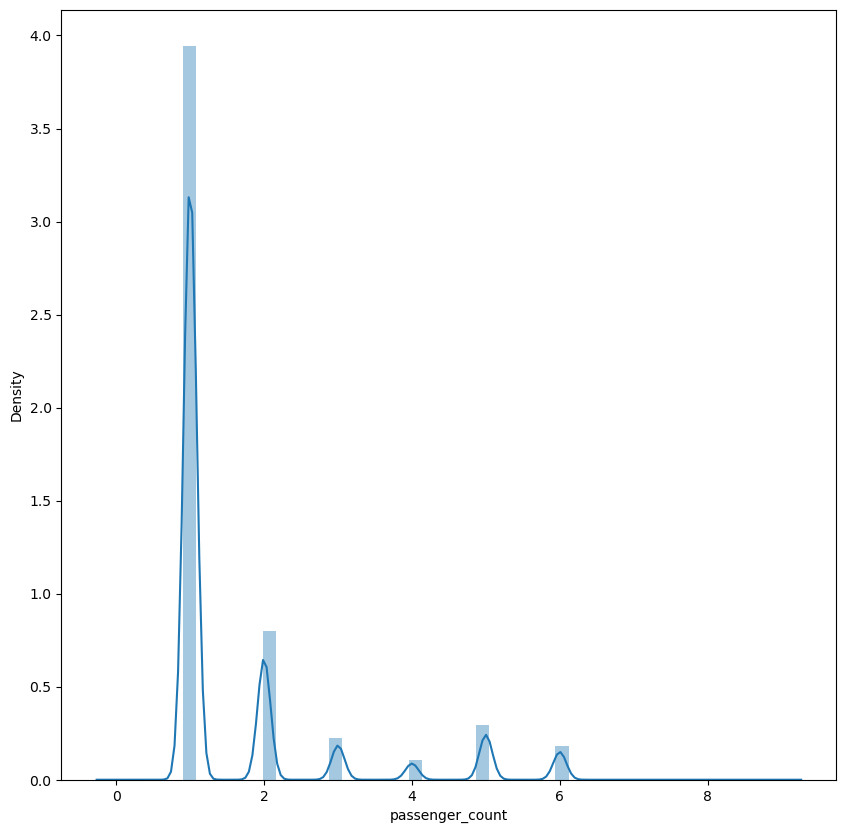

In [33]:
plt.figure(figsize=(10,10))
sns.distplot(data['passenger_count'])

In [34]:
data['passenger_count'].value_counts()

passenger_count
1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: count, dtype: int64

Following Observations can be seen from these:

a)Most of the Passengers density lies b/w 1 &2.

b)There is two Trip with max Passengers of 7 and 9.

c)There are 33 trips with zero passenger that means the booking might be cancelled due to some reason.

<AxesSubplot:>

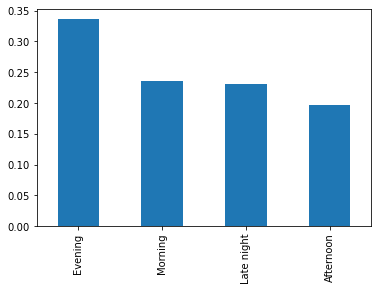

In [30]:
data['dropoff_timeofday'].value_counts(normalize= True).plot(kind='bar')

Evening Time is the Busiest Time followed by Morning which make sense as Most of People have to travel to reach office in morning and evening time back to home.

C:\Users\sahni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration', ylabel='count'>

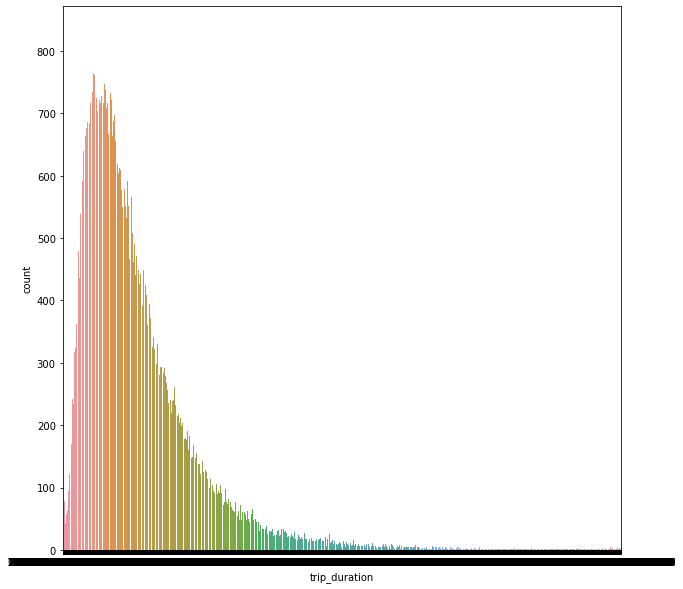

In [31]:
plt.figure(figsize=(10,10))
sns.countplot(np.log(data['trip_duration']))

C:\Users\sahni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration'>

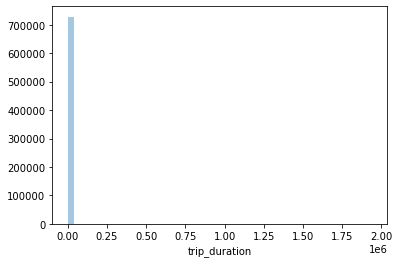

In [32]:
sns.distplot(data['trip_duration'],kde=False)


C:\Users\sahni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_duration'>

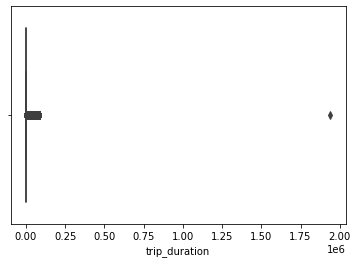

In [33]:
sns.boxplot(data['trip_duration'], orient='horizontal')

In [34]:
data['trip_duration'].sort_values(ascending=False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
672240          1
102646          1
533760          1
512833          1
622664          1
Name: trip_duration, Length: 729322, dtype: int64

In [8]:
data.drop(data[data['trip_duration'] == 1939736].index, inplace = True)

C:\Users\sahni\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration'>

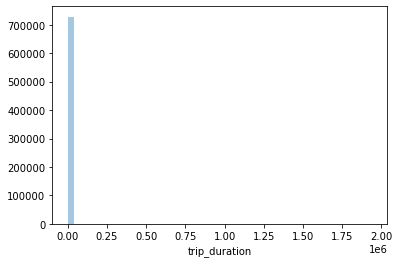

In [6]:
sns.distplot(data['trip_duration'],kde=False)

We can Observe Outliers in the Trip Duration Parameters as in the box plot.Removed Extreme Value using Drop to correct the data.


In [36]:
data['average_speed'] = data['distance']/(data['trip_duration']/3600)

In [37]:
data['average_speed'].head()


0    10.791669
1    13.513473
2    15.964983
3     7.449573
4    18.375877
Name: average_speed, dtype: float64

From Average Speed we can infer that NYC City have major Traffic.

#  Bivariate Analysis

<AxesSubplot:xlabel='vendor_id', ylabel='passenger_count'>

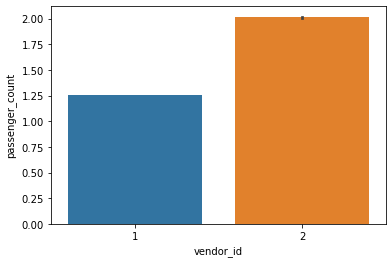

In [38]:
sns.barplot(y='passenger_count',x='vendor_id',data=data)

Most People Preferred Vendor 2 For Booking Cab Services that can lead to the Thinking part:

a)There might be either shortage of Taxi provided by vendor 1.

b)Or There might be good service Provided by Vendor B as compared to A.Lets investigate by drawing catplot.

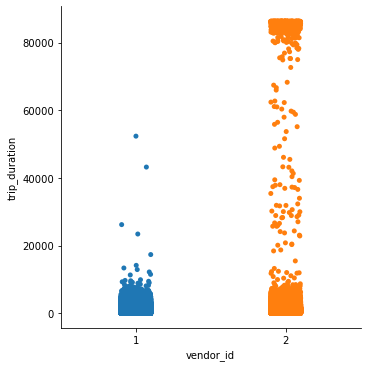

In [39]:
sns.catplot(y='trip_duration',x='vendor_id',data=data,kind='strip')

Vendor 1 Offer Short Trips.Where as Vendor 2 offer short as well as long trips thats why people preferred more Vendor 2.

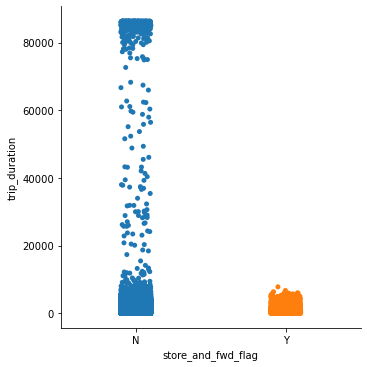

In [9]:
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip",data=data)

The Trip is Not Recorded for Longer Trip we can observe from there.For Short Trip it isrecorded

<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='passenger_count'>

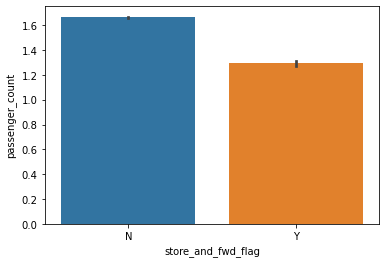

In [41]:
sns.barplot(y='passenger_count',x='store_and_fwd_flag',data=data)

1.This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not  have a connection to the server (Y=store and forward; N=not a store and forward trip)

2.This Means most of the Trip Details were not stored in a vehicle.This might be due to Connection issue that should be taken into concern in near future and should be improved.

In [42]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

vendor_id              int64
passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
pickup_day_no          int64
dropoff_day_no         int64
pickup_hour            int64
dropoff_hour           int64
pickup_minute          int64
dropoff_minute         int64
distance             float64
average_speed        float64
dtype: object

In [43]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_minute,dropoff_minute,distance,average_speed
vendor_id,1.000000,0.286462,0.008202,0.002857,0.002371,0.005260,0.035205,0.000786,0.000899,0.009769,9.701486e-03,0.000051,1.449098e-04,0.006516,0.001307
passenger_count,0.286462,1.000000,0.001164,-0.004698,-0.000027,-0.003944,0.016520,0.025757,0.025940,0.009849,9.213857e-03,-0.000213,-3.129552e-05,0.009178,-0.002637
pickup_longitude,0.008202,0.001164,1.000000,0.047648,0.780649,0.118472,0.041561,-0.016027,-0.016844,0.010762,1.117182e-02,-0.003696,-1.917578e-03,0.251472,0.095279
pickup_latitude,0.002857,-0.004698,0.047648,1.000000,0.119972,0.479358,-0.044442,-0.029078,-0.029257,0.011424,1.805920e-02,0.002838,7.303935e-04,-0.128440,0.116820
dropoff_longitude,0.002371,-0.000027,0.780649,0.119972,1.000000,0.149598,0.025331,-0.001472,-0.001396,-0.022014,-2.319331e-02,-0.003605,-2.504285e-03,0.132353,0.045955
dropoff_latitude,0.005260,-0.003944,0.118472,0.479358,0.149598,1.000000,-0.035451,-0.022027,-0.022396,0.014259,1.817335e-02,0.002801,-5.076340e-04,-0.153765,-0.054264
trip_duration,0.035205,0.016520,0.041561,-0.044442,0.025331,-0.035451,1.000000,-0.001954,-0.003706,0.005488,4.082423e-03,-0.004527,-5.622095e-03,0.152153,-0.033842
pickup_day_no,0.000786,0.025757,-0.016027,-0.029078,-0.001472,-0.022027,-0.001954,1.000000,0.993790,-0.082082,-8.576719e-02,-0.000052,-3.499387e-04,0.007792,0.044303
dropoff_day_no,0.000899,0.025940,-0.016844,-0.029257,-0.001396,-0.022396,-0.003706,0.993790,1.000000,-0.078779,-8.987681e-02,0.002244,-2.775322e-03,0.008230,0.043575
pickup_hour,0.009769,0.009849,0.010762,0.011424,-0.022014,0.014259,0.005488,-0.082082,-0.078779,1.000000,9.345925e-01,-0.003544,-2.756920e-03,-0.016258,-0.064611


In [44]:
c=numerical.corr().abs()
s=c.unstack()
so=s.sort_values(kind='quicksort',ascending=False)
so=pd.DataFrame(so,columns=['Pearson Coeficient'])

In [45]:
so[so['Pearson Coeficient']<1].head(25)

,,Pearson Coeficient
pickup_day_no,dropoff_day_no,0.993790
dropoff_day_no,pickup_day_no,0.993790
pickup_hour,dropoff_hour,0.934592
dropoff_hour,pickup_hour,0.934592
dropoff_longitude,pickup_longitude,0.780649
pickup_longitude,dropoff_longitude,0.780649
distance,average_speed,0.575085
average_speed,distance,0.575085
pickup_latitude,dropoff_latitude,0.479358
dropoff_latitude,pickup_latitude,0.479358


C:\Users\sahni\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


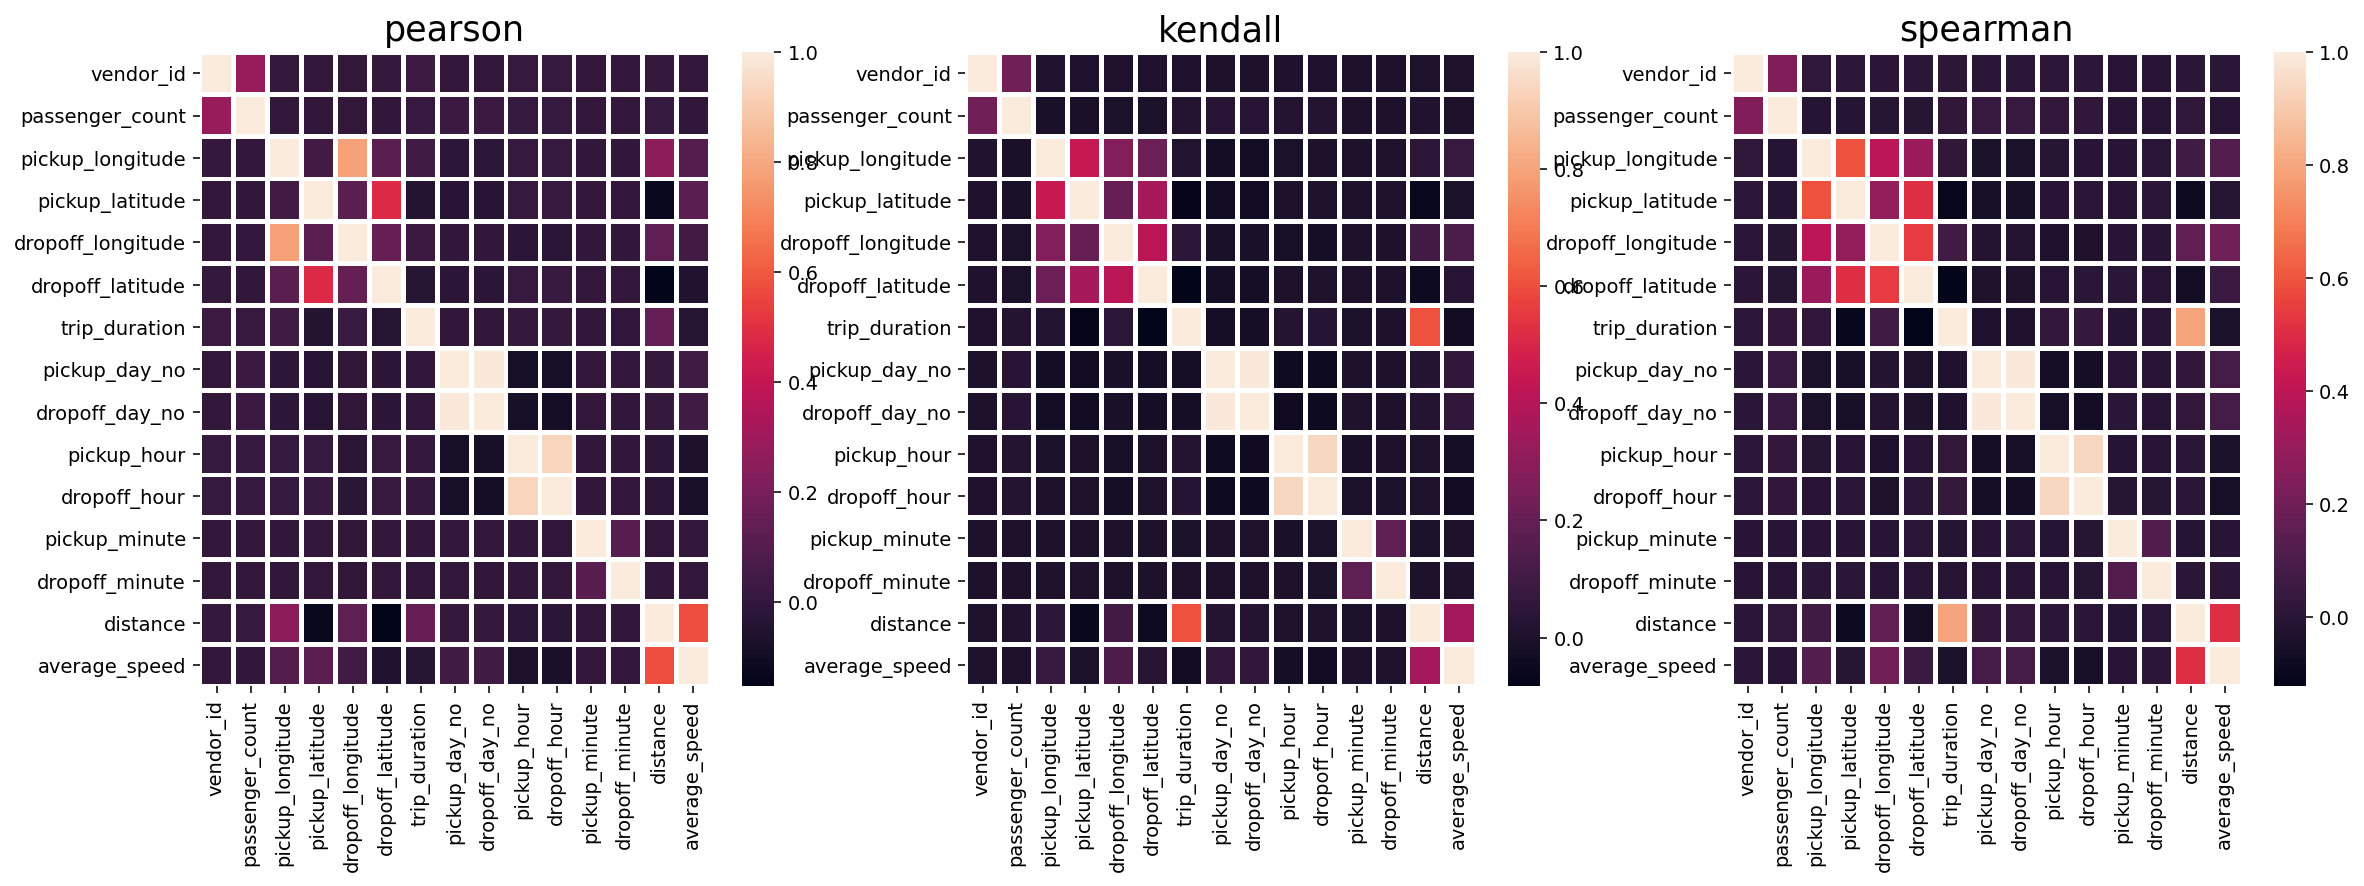

In [46]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(20,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    correlation = numerical.dropna().corr(method=i)
    sns.heatmap(correlation, linewidth = 2)
    plt.title(i, fontsize=18)

* Kendall,& Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
*  Too many variables with insignificant correlation.
*  Major correlation lies between the drop off hour and pickup hour.

<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

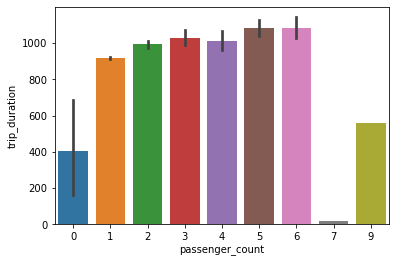

In [47]:
sns.barplot(x='passenger_count',y='trip_duration',data=data)

Most of the Passenger Trip Duration is b/w 800 to 1000 sec.
The lowest trip duration is around 0 that might be an outlier or people might have cancelled after booking.This should be investigated.

<AxesSubplot:xlabel='pickup_hour', ylabel='trip_duration'>

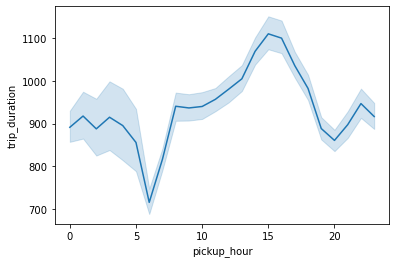

In [48]:
sns.lineplot(x='pickup_hour', y='trip_duration',data=data)


<AxesSubplot:xlabel='pickup_timeofday', ylabel='trip_duration'>

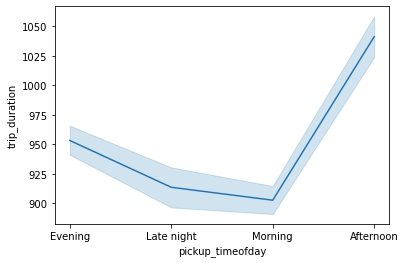

In [49]:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=data)

We can Observe that afternoon around 2:00 to 4:00 is the Busiest Time.

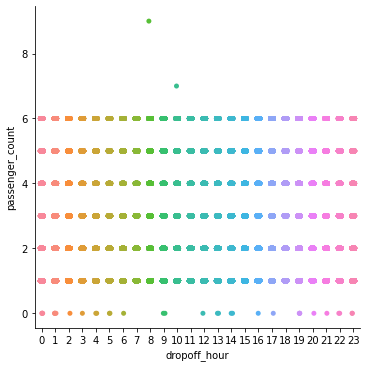

In [50]:
sns.catplot(x='dropoff_hour',y='passenger_count',data=data)

There is no significant relation b/w passenger count and dropoff hr.

<AxesSubplot:xlabel='average_speed', ylabel='trip_duration'>

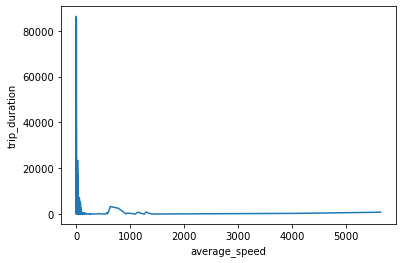

In [51]:
sns.lineplot(x='average_speed', y='trip_duration',data=data)

In [78]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [79]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [86]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

C:\Users\sahni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


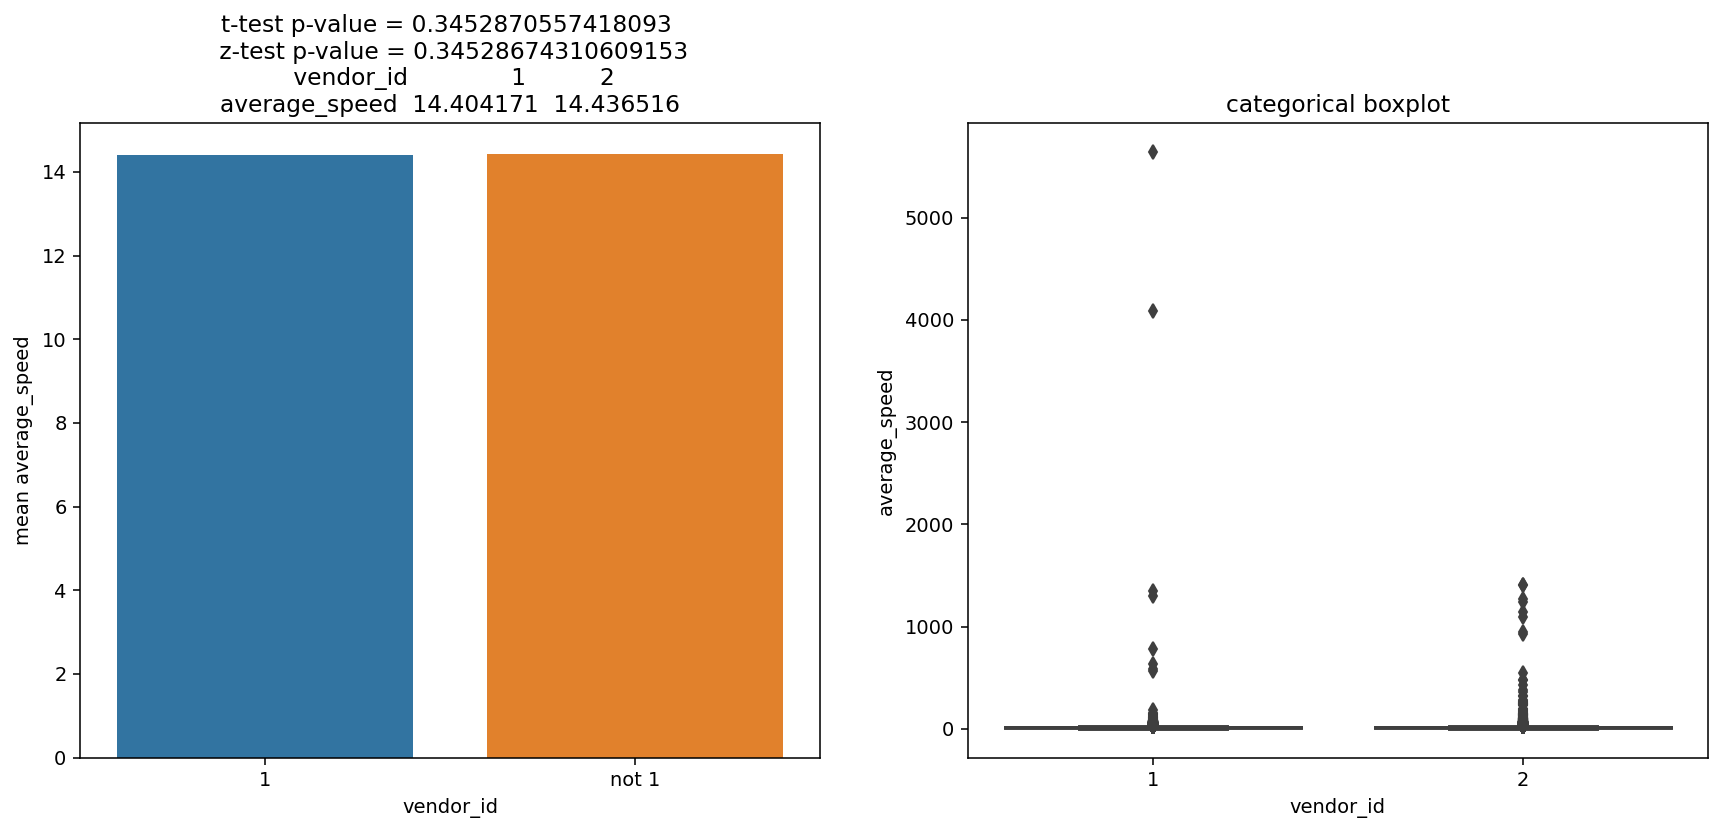

In [87]:
Bivariate_cont_cat(data, 'average_speed', 'vendor_id', 1)

 There is no Significant change in average speed for both the Vendors.

C:\Users\sahni\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


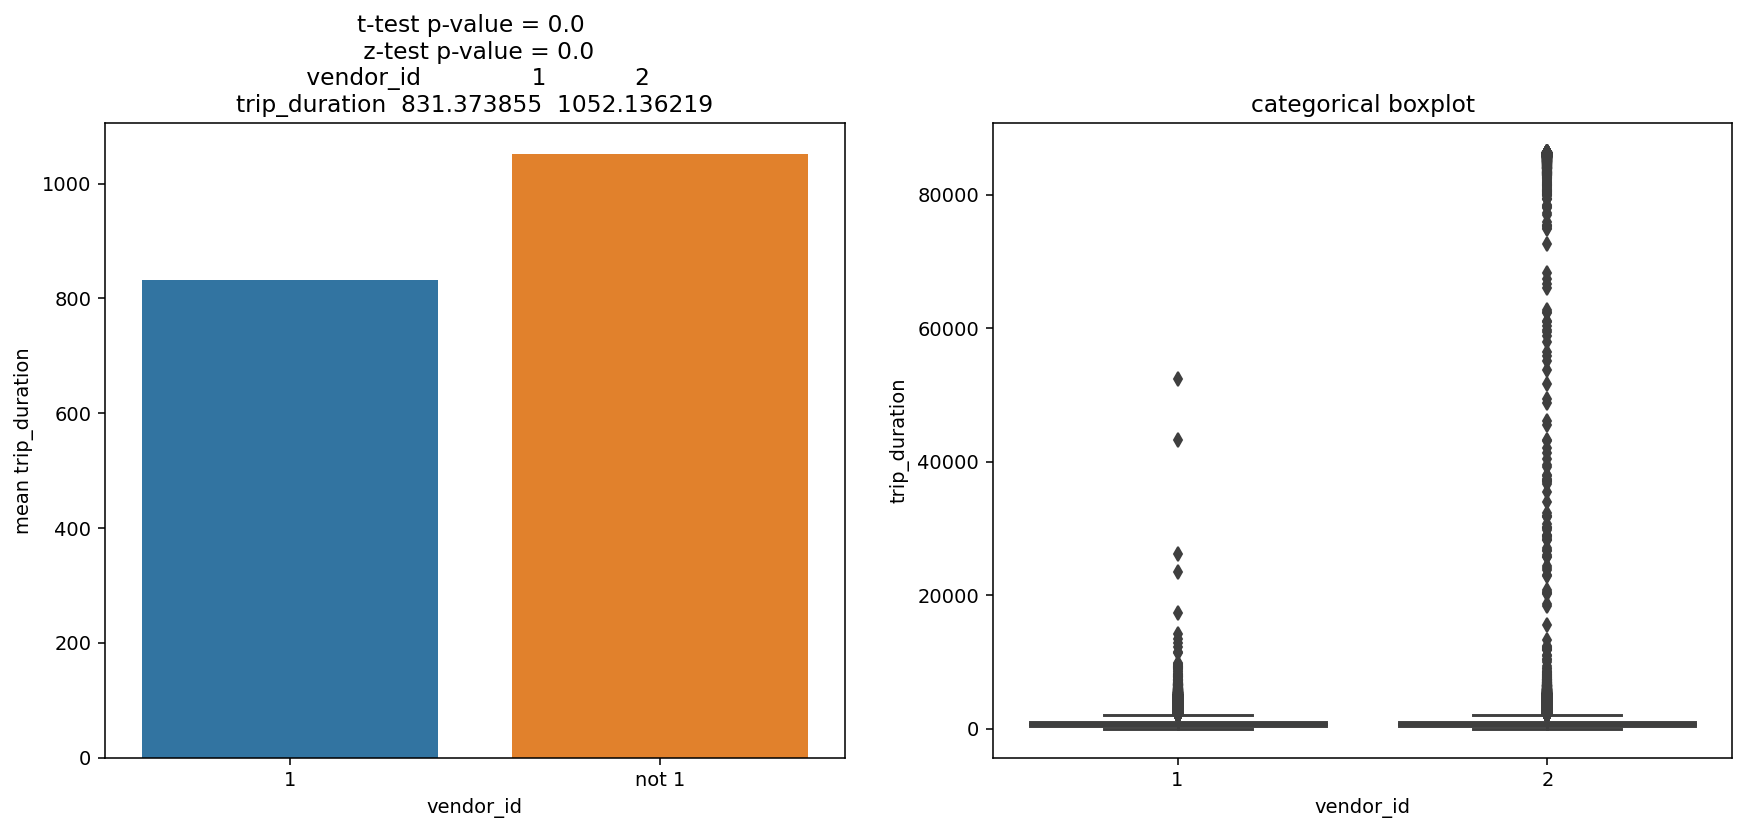

In [88]:
Bivariate_cont_cat(data, 'trip_duration', 'vendor_id', 1)

There is a significant Change.
Vendor 2 trip duration is more as compared to Vendor 1 

In [ ]:
Bivariate_cont_cat(data, 'passenger_count', 'vendor_id', 1)

# Multivariate Analysis

In [85]:
# Calculating the correlation
corr =data.corr()

<AxesSubplot:>

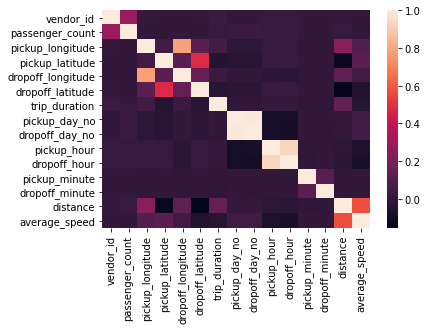

In [57]:
sns.heatmap(corr)

Strong Relationship b/w Pickup day and Dop off Day.
Moderate Relationship b/w average speed and Distance.

Text(0, 0.5, 'mean(trip_duration)')

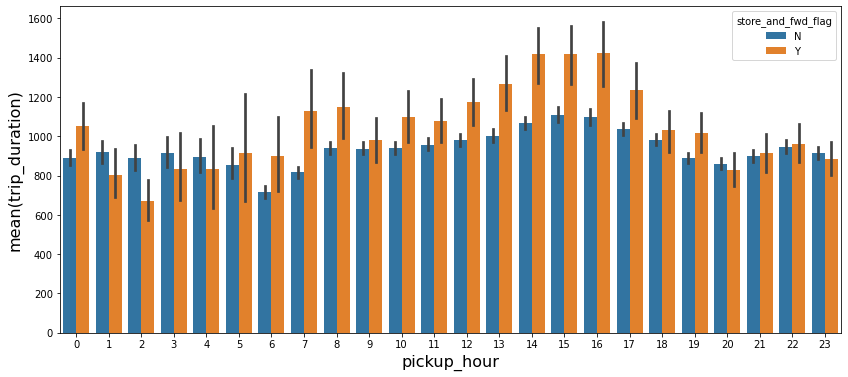

In [67]:
plt.figure(figsize=(14,6))
sns.barplot(x='pickup_hour',y='trip_duration',data=data,hue='store_and_fwd_flag')
plt.xlabel('pickup_hour',fontsize=16)
plt.ylabel('mean(trip_duration)',fontsize=16)

For Longer Trips the Flags were Recorded as compared to shorter trips we can Infer from here.

Text(0.5, 1.0, 'Pickup hr vs speed ')

<Figure size 1440x864 with 0 Axes>

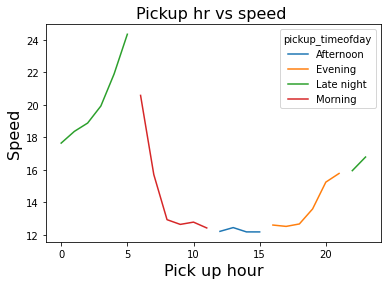

In [74]:
plt.figure(figsize=(20,12))
pd.pivot_table(data, index='pickup_hour',columns='pickup_timeofday' ,aggfunc=np.mean)['average_speed'].plot()
plt.xlabel('Pick up hour',fontsize=16)
plt.ylabel('Speed',fontsize=16)
plt.title('Pickup hr vs speed ',fontsize=16)

We can infer from that:

1.Late Night the Avg speed is max as traffic might be less.

2.During Morning and Afternoon time the traffic Condition would be dense which shows the average speed of car is less(12-20km/hr)